# RECOMMENDATION SYSTEMS MODULE PROJECT

# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps

In [4]:
import pandas as pd
import numpy as np
import os
path = 'g:/AIML Course Materials/Projects/RecommendationSystems/Data Set/Data Set/'
os.listdir(path)
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# used to supress display of warnings
import warnings
# suppress display of warnings
warnings.filterwarnings('ignore')

1A. Merge all the provided CSVs into one dataFrame

In [6]:
# creates list with files to merge based on name convention
file_list = [path + f for f in os.listdir(path) if f.startswith('phone_user_review_file_')]

# creates empty list to include the content of each file converted to pandas DF
csv_list = []
 
# reads each (sorted) file in file_list, converts it to pandas DF and appends it to the csv_list
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file,encoding='ISO-8859-1').assign(File_Name = os.path.basename(file)))

# merges single pandas DFs into a single DF, index is refreshed 
csv_merged = pd.concat(csv_list, ignore_index=True)

# Single DF is saved to the path in CSV format, without index column
csv_merged.to_csv(path + 'phone_data_full.csv', index=False)

In [7]:
pd_df=pd.read_csv('g:/AIML Course Materials/Projects/RecommendationSystems/Data Set/Data Set/phone_data_full.csv')

In [8]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
 11  File_Name  1415133 non-null  object 
dtypes: float64(2), object(10)
memory usage: 129.6+ MB


In [9]:
pd_df.shape

(1415133, 12)

# 1.B Explore, understand the Data and share at least 2 observations

In [10]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


Standard deviation from the mean score of 8 is 2.616121e+00

In [11]:
#check for missing values
pd_df.isnull().values.any() # If there are any null values in data set

True

In [12]:
nulls = pd_df.isnull().sum()  # This prints the columns with the number of null values they have
print (nulls)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
File_Name        0
dtype: int64


# 1.D. Check for missing values. Impute the missing values, if any.

(Could not convert float to integer for 'score' and 'score-max' columns in question 1.C without imputing. 
Hence, completing the imputing and then moving for integer conversion for respective columns)

In [13]:
pd_df['score'].mean()

8.007059551183373

In [14]:
pd_df['score'].median()

9.2

In [15]:
pd_df['score_max'].mean()

10.0

In [16]:
pd_df['score_max'].median()

10.0

In [17]:
#filling the null values in column 'score' and 'score_max' with median
pd_df=pd_df.fillna(pd_df.median())

In [18]:
pd_df.shape

(1415133, 12)

# 1.C. Round off scores to the nearest integers

In [19]:
pd_df['score']=pd_df['score'].astype(int)
pd_df['score_max']=pd_df['score_max'].astype(int)

In [20]:
pd_df.dtypes

phone_url    object
date         object
lang         object
country      object
source       object
domain       object
score         int32
score_max     int32
extract      object
author       object
product      object
File_Name    object
dtype: object

# 1.E. Check for duplicate values and remove them, if any.

In [21]:
pd_df_dedup=pd_df.drop_duplicates()

In [22]:
pd_df_dedup.shape

(1408953, 12)

# 1. G. Drop irrelevant features. Keep features like Author, Product, and Score.

(Proceeding with question 1.G before 1.F to save computation time as dropping columns would reduce data size)

In [23]:
pd_df_dedup.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,File_Name
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8,phone_user_review_file_1.csv
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8,phone_user_review_file_1.csv
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",phone_user_review_file_1.csv
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T),phone_user_review_file_1.csv
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8,phone_user_review_file_1.csv


In [24]:
# we can drop phone_url,date,lang,country,source,domain and extract since they do not contribute in deciding popularity.  
pd_df_dedup.drop(['phone_url','date','lang','country','source','domain','score_max','extract','File_Name'], axis = 1, inplace = True)

In [25]:
pd_df_final=pd_df_dedup.copy()

In [26]:
pd_df_final

,score,author,product
0,10,CarolAnn35,Samsung Galaxy S8
1,10,james0923,Samsung Galaxy S8
2,6,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,S Ate Mine,Samsung Galaxy S8
...,...,...,...
1415128,2,david.paul,Alcatel Club Plus Handy
1415129,10,Christiane14,Alcatel Club Plus Handy
1415130,2,michaelawr,Alcatel Club Plus Handy
1415131,8,claudia0815,Alcatel Club Plus Handy


# 1.F. Keep only 1 Million data samples. Use random state=612

In [27]:
df = pd_df_final.sample(n=1000000, random_state=612)

In [28]:
df.shape

(1000000, 3)

In [29]:
df.head()

,score,author,product
975095,10,Lady,LG P698 Optimus Link Dual Sim (Black)
944977,6,contemat,"Nokia Asha 305 Smartphone, Dual Band, Dual SIM..."
79826,10,rafa21,Samsung Galaxy S6 edge 64GB (Verizon)
208439,10,Rober,"Smartphone Google Google Nexus 5X (32 GB, negr..."
1717,8,cjsantiago2005,Samsung Galaxy S6 edge+ 64GB (AT&T)


In [30]:
print('-' * 50)
print('2. Answer the following questions.')
print('-' * 50)

--------------------------------------------------
2. Answer the following questions.
--------------------------------------------------


# 2.A. Identify the most rated products

In [31]:
df.groupby('product')['score'].value_counts().sort_values(ascending=False).head()

product                            score
OnePlus 3 (Graphite, 64 GB)        10       1979
OnePlus 3 (Soft Gold, 64 GB)       10       1635
Samsung Galaxy Express I8730       9        1474
Lenovo Vibe K4 Note (White,16GB)   10       1329
Lenovo Vibe K4 Note (Black, 16GB)  10       1118
Name: score, dtype: int64

In [32]:
#Most rated product in terms of number of review counts is shown above

In [33]:
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...                    10.0
Samsung Galaxy A8 SM-A800I (White)                                                                                                            10.0
Samsung Galaxy Fame Lite GT-S6790 - Smartphone (88.9 mm (3.5 "), 480 x 320 Pixeles, TFT, 0.85 GHz, 4 GB, microSD (TransFlash)) (importado)    10.0
Samsung Galaxy Fame - 4 GB - White on O2 Pay & Go with Â£10 Airtime                                                                           10.0
Samsung Galaxy Fame (S6810) - Smartphone libre Android (pantalla 3.5", cÃ¡mara 5 Mp, 4 GB, 1 GHz, 512 MB RAM), azul                           10.0
Name: score, dtype: float64

In [34]:
#Most rated product in terms of average review score is shown above

# 2.B. Identify the users with most number of reviews

In [35]:
df['author'].value_counts().head()

Amazon Customer    54602
Cliente Amazon     13603
e-bit               5959
Client d'Amazon     5496
Amazon Kunde        3282
Name: author, dtype: int64

In [127]:
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3699
Lenovo Vibe K4 Note (Black, 16GB)    3093
OnePlus 3 (Graphite, 64 GB)          2887
OnePlus 3 (Soft Gold, 64 GB)         2521
Huawei P8lite zwart / 16 GB          1895
Name: product, dtype: int64

# 2. C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset

In [36]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'author_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['author_count'] = list(df['author'].value_counts() > 50)

In [37]:
# get names of indexes for which count column value is False. False means the user rating of less than 50 counts
index_names = df1[ df1['author_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1

,author,author_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
640,Anoniem,True
641,Ale,True
642,Fabian,True
643,Lars,True


In [38]:
# extracting product that got more than 50 ratings
df2 = pd.DataFrame(columns=['product', 'prod_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['prod_count'] = list(df['product'].value_counts() > 50)

In [39]:
# get names of indexes for which count column value is False.False means the product rating of less than 50 counts
index_names = df2[ df2['prod_count'] == False ].index 
# drop these row indexes from dataFrame 
df2.drop(index_names, inplace = True)
df2

,product,prod_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4270,Samsung G870A Galaxy S5 Active for AT&T [Camo ...,True
4271,"Nokia 2720 Fold TÃ©lÃ©phone portable Ecran 1,8...",True
4272,Samsung Galaxy S5 White 16GB (Virgin Mobile),True
4273,"HTC Evo 3D Smartphone (10,9 cm (4,3 Zoll) Disp...",True


In [40]:
# selecting data rows where product is having more than 50 ratings.  
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
944977,6,contemat,"Nokia Asha 305 Smartphone, Dual Band, Dual SIM..."
79826,10,rafa21,Samsung Galaxy S6 edge 64GB (Verizon)
1717,8,cjsantiago2005,Samsung Galaxy S6 edge+ 64GB (AT&T)
962642,10,Chrystal,HTC Droid Incredible 4G LTE 6410 8GB Verizon C...
236370,2,Mark V.,HTC Desire Eye E1 16GB White/Red. GSM Unlocked...
...,...,...,...
317979,10,Tim Christensen,"Cubot NOTE S Quad Core 5,5"" Zoll 3G-Smartphone..."
301400,8,Pere,BQ Aquaris E5 HD - Smartphone libre Android (p...
1301599,8,sbx,Nokia 2760
368673,10,Florencia M.,Samsung Galaxy Grand Prime G531H/DS Internatio...


In [41]:
# selecting data rows from df3 where author has given more than 50 ratings.
# With the above dataset (df3), we get the data with products having more than 50 ratings and users who have given more than 50 ratings
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
547132,10,Gary,"OnePlus 2 Unlocked Smartphone, 64GB Sandstone ..."
1120208,4,Amazon Customer,"Nokia X6 Unlocked GSM Phone, 16GB, Black"
201561,2,Amazon Customer,"Microsoft Lumia 640 XL (Black, 8GB)"
658690,6,Amazon Customer,Samsung Galaxy S4 Mini GT-i9195i Unlocked Cell...
625082,7,ÐÐ²Ð°Ð½,Sony Xperia C (ÑÐµÑÐ½ÑÐ¹)
...,...,...,...
436431,10,James,LG Electronics G2D802 UK SIM-Free Smartphone -...
534153,8,Julia,"Apple iPhone 5s T-Mobile Cellphone, 16GB, Spac..."
16056,10,Simone,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...
191638,2,Amazon Customer,Huawei Honor 5X (Silver)


In [42]:
#Shape of the final dataset which has data with products having more than 50 ratings and also users who has given more than 50 ratings.
df4.shape 

(101300, 3)

# 3. Build a popularity based model and recommend top 5 mobile phones

In [44]:
#calculating the mean score for a product by grouping it.
prod_rat_mean_count = pd.DataFrame(df.groupby('product')['score'].mean())

In [45]:
# calculating the number of ratings a product got
prod_rat_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())

In [46]:
# 3. Recommending the 5 mobile phones based on highest mean score and highest number of ratings the product got. 
prod_rat_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,137
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,128
Samsung Galaxy Note5,10.0,127
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,124
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,121


In [47]:
#The above are the top 5 recommended mobile phones from popularity based recommendation

# 4. Build a collaborative filtering model using SVD

In [49]:
#importing necessary libraries

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Libraries for collabrative recommendation systems
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [50]:
!pip install translate
!pip install google-trans-new

In [51]:
from google_trans_new import google_translator
from translate import Translator

In [52]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
pd.set_option('display.max_colwidth', None)
plt.style.use('bmh')

In [53]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
cols_titles = ['author','product','score']
df_rev = pd_df_final.reindex(columns=cols_titles)

In [54]:
# Keep only 5000 data samples. Use random state=612
df_final = df_rev.sample(n=5000, random_state=612)

In [55]:
#Reading dataset into data
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_final,reader = reader)

In [56]:
#training the data
trainset = data.build_full_trainset()
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 6.0)],
             2: [(2, 10.0)],
             3: [(3, 10.0)],
             4: [(4, 8.0)],
             5: [(5, 10.0)],
             6: [(6, 9.0)],
             7: [(7, 10.0)],
             8: [(8, 6.0)],
             9: [(9, 10.0)],
             10: [(10, 2.0)],
             11: [(11, 2.0)],
             12: [(12, 10.0)],
             13: [(13, 8.0)],
             14: [(14, 9.0)],
             15: [(15, 10.0), (3000, 10.0)],
             16: [(16, 6.0)],
             17: [(17, 10.0)],
             18: [(18, 10.0),
              (45, 10.0),
              (57, 10.0),
              (91, 10.0),
              (118, 6.0),
              (122, 6.0),
              (143, 10.0),
              (150, 10.0),
              (164, 10.0),
              (189, 4.0),
              (224, 10.0),
              (249, 9.0),
              (258, 10.0),
              (16, 8.0),
              (271, 10.0),
              (273, 6.0),
              

In [57]:
algo_SVD = SVD()
algo_SVD.fit(trainset)

In [58]:
# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [59]:
pred_SVD = algo_SVD.test(testset)
pred_SVD

[Prediction(uid='Lady', iid='Nokia Asha 305 Smartphone, Dual Band, Dual SIM, Display da 3", Rosso [Italia]', r_ui=7.9942, est=8.006813252443315, details={'was_impossible': False}),
 Prediction(uid='Lady', iid='Samsung Galaxy S6 edge 64GB (Verizon)', r_ui=7.9942, est=8.260406555850782, details={'was_impossible': False}),
 Prediction(uid='Lady', iid='Smartphone Google Google Nexus 5X (32 GB, negro carbÃ³n) LGH791.A3GBBK', r_ui=7.9942, est=8.411071753537295, details={'was_impossible': False}),
 Prediction(uid='Lady', iid='Samsung Galaxy S6 edge+ 64GB (AT&T)', r_ui=7.9942, est=8.268626182528024, details={'was_impossible': False}),
 Prediction(uid='Lady', iid='Lenovo Ð\x9cÐ¾Ð±Ð¸Ð»Ñ\x8cÐ½Ñ\x8bÐ¹ Ñ\x82ÐµÐ»ÐµÑ\x84Ð¾Ð½ Lenovo a6010 pro', r_ui=7.9942, est=8.21838963591755, details={'was_impossible': False}),
 Prediction(uid='Lady', iid='Smartphone Asus Zenfone 2 Laser 5.5" ZE550KL Desbloqueado Preto', r_ui=7.9942, est=8.123366097573216, details={'was_impossible': False}),
 Prediction(uid='Lady',

In [60]:
# Above are the predicted items and their estimated ratings for test user.

In [61]:
# Building a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [62]:
df_KNN_RS = df_rev.sample(n=5000, random_state=612)

In [79]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_KNN = Dataset.load_from_df(df_final,reader = reader)

In [80]:
#Split dataset to train & test sets
trainset_KNN_I, testset_KNN_I = train_test_split(data_KNN, test_size=.15)

In [81]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNN_I = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_KNN_I.fit(trainset_KNN_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [82]:
# run the  model against the testset
test_pred_KNN_I = algo_KNN_I.test(testset_KNN_I)

In [83]:
test_pred_KNN_I

[Prediction(uid='Amazon Customer', iid='HTC One S C2 grey', r_ui=2.0, est=7.97835294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='KAMMA', iid='Asus ZE550KL Zenfone 2 Laser Smartphone, Display 5.5", 16 GB, Dual-SIM, Oro [Italia]', r_ui=10.0, est=7.97835294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Joshua C.Tillmon jr.', iid='Tracone Motorola EX431G Prepaid Phone With Triple Minutes (Tracfone)', r_ui=10.0, est=7.97835294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Dan', iid='Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) pink', r_ui=8.0, est=7.97835294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='anonym', iid='Qtek 8080', r_ui=6.0, est=7.97835294117647, details={'was_impossible': True, 'reason': 'User and/o

In [84]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_KNN_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.6722


2.6722303239769007

In [87]:
# Read dataset for user based collabrative filtering
reader = Reader(rating_scale=(1, 10))
data_KNN_U = Dataset.load_from_df(df_final,reader = reader)

In [88]:
#Split dataset to train & test sets for user based fitering
trainset_KNN_U, testset_KNN_U = train_test_split(data_KNN_U, test_size=.15)

In [89]:
algo_KNN_U = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_KNN_U.fit(trainset_KNN_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [90]:
# run the  model against the testset
test_pred_KNN_U = algo_KNN_UU.test(testset_KNN_U)

In [91]:
test_pred_KNN_U

[Prediction(uid='VICTOR RODRIGUEZ', iid='Apple iPhone 4 A1332 16GB White (GSM Unlocked)', r_ui=2.0, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='mr peter ward', iid="Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4G Smartphone Quad Core 1GB/8GB Dual SIM Cellphone Phablet (Golden)", r_ui=2.0, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Carmen S.', iid='Samsung Galaxy J3 (2016) DUOS Smartphone (5,0 Zoll (12,63 cm Touch-Display, 8 GB Speicher, Android 5.1) gold', r_ui=10.0, est=8.000470588235293, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='Samsung Wave 525 GT-S5250', r_ui=10.0, est=8.0, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='Aravind', iid='Samsung Galaxy Grand Neo Plus GT-I9060I (Midnight Black, 8GB)', r_ui=10.0, est=10, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=nan, iid='Nokia Lumia 620', r_ui=10.0, est=10, details

In [92]:
# get RMSE for User based collabrative filtering
print("User-based Model : Test Set")
accuracy.rmse(test_pred_KNN_U, verbose=True)

User-based Model : Test Set
RMSE: 1.1416


1.1415704650813125

# 5. Evaluate the collaborative model. Print RMSE value

In [95]:
# get RMSE
print("Item-based Collabrative Model : Test Set")
accuracy.rmse(test_pred_KNN_I, verbose=True)

Item-based Collabrative Model : Test Set
RMSE: 2.6722


2.6722303239769007

In [96]:
# get RMSE for User based collabrative filtering
print("User-based Collabrative Model : Test Set")
accuracy.rmse(test_pred_KNN_U, verbose=True)

User-based Collabrative Model : Test Set
RMSE: 1.1416


1.1415704650813125

In [128]:
# get RMSE for User based collabrative filtering
print("SVD Model : Test Set")
accuracy.rmse(pred_SVD, verbose=True)

SVD Model : Test Set
RMSE: 0.3362


0.3362215824106787

In [132]:
#From the above results, it is found that SVD gave the lowest RMSE.

# 6. Predict score (average rating) for test users

In [99]:
# Using SVD to predict score (average rating) for test users

In [100]:
svd_pred_df=pd.DataFrame(pred_SVD, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

In [134]:
svd_pred_df.head()

,uid,iid,r_ui,est,details
0,Lady,"Nokia Asha 305 Smartphone, Dual Band, Dual SIM, Display da 3"", Rosso [Italia]",7.9942,8.006813,{'was_impossible': False}
1,Lady,Samsung Galaxy S6 edge 64GB (Verizon),7.9942,8.260407,{'was_impossible': False}
2,Lady,"Smartphone Google Google Nexus 5X (32 GB, negro carbÃ³n) LGH791.A3GBBK",7.9942,8.411072,{'was_impossible': False}
3,Lady,Samsung Galaxy S6 edge+ 64GB (AT&T),7.9942,8.268626,{'was_impossible': False}
4,Lady,Lenovo ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo a6010 pro,7.9942,8.218390,{'was_impossible': False}


In [129]:
print("SVD: ")
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['r_ui'].mean())
print('average prediction error for test users: ',(svd_pred_df['r_ui']-svd_pred_df['est']).abs().mean())

SVD: 
average prediction for test users:  8.006503616433383
average rating  by test users:  7.9942000024446624
average prediction error for test users:  0.27160849821736976


In [103]:
# Using Item based Collabrative filtering to predict score (average rating) for test users

In [104]:
collab_item_pred_df=pd.DataFrame(test_pred_KNN_I, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

In [105]:
collab_item_pred_df.head()

,uid,iid,r_ui,est,details
0,Amazon Customer,HTC One S C2 grey,2.0,7.978353,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"
1,KAMMA,"Asus ZE550KL Zenfone 2 Laser Smartphone, Display 5.5"", 16 GB, Dual-SIM, Oro [Italia]",10.0,7.978353,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"
2,Joshua C.Tillmon jr.,Tracone Motorola EX431G Prepaid Phone With Triple Minutes (Tracfone),10.0,7.978353,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"
3,Dan,"Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) pink",8.0,7.978353,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"
4,anonym,Qtek 8080,6.0,7.978353,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"


In [130]:
print("Item based collabrative filtering: : ")
print('average prediction for test users: ',collab_item_pred_df['est'].mean())   
print('average rating  by test users: ',collab_item_pred_df['r_ui'].mean())
print('average prediction error for test users: ',(collab_item_pred_df['r_ui']-collab_item_pred_df['est']).abs().mean())

Item based collabrative filtering: : 
average prediction for test users:  7.963480961445053
average rating  by test users:  8.084
average prediction error for test users:  2.031526447416844


In [107]:
# Using User based Collabrative filtering to predict score (average rating) for test users

In [108]:
collab_user_pred_df=pd.DataFrame(test_pred_KNN_U, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

In [109]:
collab_user_pred_df.head()

,uid,iid,r_ui,est,details
0,VICTOR RODRIGUEZ,Apple iPhone 4 A1332 16GB White (GSM Unlocked),2.0,2.000000,"{'actual_k': 1, 'was_impossible': False}"
1,mr peter ward,Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4G Smartphone Quad Core 1GB/8GB Dual SIM Cellphone Phablet (Golden),2.0,2.000000,"{'actual_k': 1, 'was_impossible': False}"
2,Carmen S.,"Samsung Galaxy J3 (2016) DUOS Smartphone (5,0 Zoll (12,63 cm Touch-Display, 8 GB Speicher, Android 5.1) gold",10.0,8.000471,"{'was_impossible': True, 'reason': 'User and/or item is unknown.'}"
3,NaN,Samsung Wave 525 GT-S5250,10.0,8.000000,"{'actual_k': 3, 'was_impossible': False}"
4,Aravind,"Samsung Galaxy Grand Neo Plus GT-I9060I (Midnight Black, 8GB)",10.0,10.000000,"{'actual_k': 1, 'was_impossible': False}"


In [131]:
print("User based collabrative filtering: ")
print('average prediction for test users: ',collab_user_pred_df['est'].mean())  
print('average rating  by test users: ',collab_user_pred_df['r_ui'].mean())
print('average prediction error for test users: ',(collab_user_pred_df['r_ui']-collab_user_pred_df['est']).abs().mean())

User based collabrative filtering: 
average prediction for test users:  8.077351649372321
average rating  by test users:  8.177333333333333
average prediction error for test users:  0.3888241232633106


# 7. Report your findings and inferences

SVD has the lowest RMSE and seems to be better than collabrative filtering - user or item based

SVD has the best predciciton compared to collabrative filtering - user or item based

Motorola Smartphone Motorola Moto X was rated top of the 5 recommended phone by popularity based recommendation system

Data set used only 5000 random samples due to computation limits. If the whole of dataset is used, the recommendation rating results could differ

Amazon Customer is the leading author for reviews as most of the review are given by them

Nokia 5800 leads the top 5 list of recommended phone through SVD recommendation.



# 8. Try and recommend top 5 products for test users

In [113]:
def get_top_n(pred, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [115]:
%%time
#recommend top 5 products for test users
top_5_SVD = get_top_n(pred_SVD, n=5)
print('Top 5 recommendations from SVD recommendation for all test users are: \n')
for key,value in top_5_SVD.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users

Top 5 recommendations from SVD recommendation for all test users are: 

Lady ->  [('Nokia 5800', 9.253116311192063), ('Samsung Galaxy S6 32GB (Verizon)', 8.947449575493913), ('Nokia 5800 XpressMusic', 8.909200958861014), ('Samsung Galaxy J3 (8GB)', 8.876818478333742), ('Samsung Galaxy Express I8730', 8.855869870005831)] 

contemat ->  [('Nokia 5800 XpressMusic', 8.66299995851525), ('Nokia 5800', 8.658305879196371), ('Samsung Galaxy S7 edge 32GB (T-Mobile)', 8.563501356967766), ('Nokia 5530 XpressMusic', 8.500042867786199), ('Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera, Quad-core 1.8GHz', 8.474474997358872)] 

rafa21  ->  [('Nokia 5800', 9.116350862701665), ('Nokia 5800 XpressMusic', 8.865098586540451), ('Sony Xperia Z1', 8.856573775422614), ('Nokia 5530 XpressMusic', 8.837752331625193), ('Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia]', 8.804538795449648)] 

Rober ->  [('Nokia 5800', 9.10205946

In [116]:
%%time
#recommend top 5 products for test users
top_5_KNN_I = get_top_n(test_pred_KNN_I, n=5)
print('Top 5 recommendations from Item based recommendation for all test users are: \n')
for key,value in top_5_KNN_I.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users


Top 5 recommendations from Item based recommendation for all test users are: 

Amazon Customer ->  [('Doro PhoneEasy 612 GSM Sim Free Mobile Phone - Black', 10), ('Samsung Galaxy J7 SM-J700F (Black, 16GB)', 10), ('Cubot NOTE S 4150 mAh Big Battery 3G Unlocked Dual Sim Smartphone 5.5 Inch HD Quad Core 1.3 GHz Android 5.1 Lollipop OS Sim Free Smart Phone 2GB RAM 16GB ROM Dual Camera WIFI GPS Bluetooth(Black)', 10), ('Lenovo A6000 (White, 8GB)', 10), ("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 9.714285714285714)] 

KAMMA ->  [('Asus ZE550KL Zenfone 2 Laser Smartphone, Display 5.5", 16 GB, Dual-SIM, Oro [Italia]', 7.97835294117647)] 

Joshua C.Tillmon jr. ->  [('Tracone Motorola EX431G Prepaid Phone With Triple Minutes (Tracfone)', 7.97835294117647)] 

Dan ->  [('Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner S

In [117]:
%%time
#recommend top 5 products for test users
top_5_KNN_U = get_top_n(test_pred_KNN_U, n=5)
print('Top 5 recommendations from User based recommendation for all test users are: \n')
for key,value in top_5_KNN_U.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users

Top 5 recommendations from User based recommendation for all test users are: 

VICTOR RODRIGUEZ ->  [('Apple iPhone 4 A1332 16GB White (GSM Unlocked)', 2.0)] 

mr peter ward ->  [("Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4G Smartphone Quad Core 1GB/8GB Dual SIM Cellphone Phablet (Golden)", 2.0)] 

Carmen S. ->  [('Samsung Galaxy J3 (2016) DUOS Smartphone (5,0 Zoll (12,63 cm Touch-Display, 8 GB Speicher, Android 5.1) gold', 8.000470588235293)] 

nan ->  [('Nokia Lumia 620', 10), ('Samsung I9105P Galaxy S II Plus Chic White EU [Android 4.1, 1,2 GHz Dual-Core-CPU, 10,9 cm Super AMOLED]', 10), ('Nokia Lumia 520', 10), ('Sony Ericsson P1i', 10), ('Nokia 208 Rot [6,1cm (2,4") Farbdisplay, 1,3MP Kamera, Bluetooth, E-Mail-Exchange, Musik-Player]', 10)] 

Aravind ->  [('Samsung Galaxy Grand Neo Plus GT-I9060I (Midnight Black, 8GB)', 10)] 

John P. ->  [('Tracfone Motorola Moto E Android Prepaid Phone with Triple Minutes (Tracfone)', 10)] 

Marisia ->  [('BLU Vivo XL Smartphone - 5.5" 4G LT

# 9. Try other techniques (Example: cross validation) to get better results

In [123]:
%%time
svd_cv = cross_validate(algo_SVD,data, measures=['RMSE'], cv=3, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.59 

CPU times: total: 516 ms
Wall time: 566 ms


{'test_rmse': array([2.6429549 , 2.65867729, 2.47794024]),
 'fit_time': (0.18450403213500977, 0.16559743881225586, 0.1685490608215332),
 'test_time': (0.00797891616821289, 0.006975650787353516, 0.00698399543762207)}

In [124]:
%%time
KNN_I_cv = cross_validate(algo_KNN_I,data_KNN, measures=['RMSE'], cv=3, verbose=False)
print('\n Mean Item based collabrative filtering cv score:', round(KNN_I_cv['test_rmse'].mean(),2),'\n')
KNN_I_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean Item based collabrative filtering cv score: 2.64 

CPU times: total: 578 ms
Wall time: 666 ms


{'test_rmse': array([2.5643774 , 2.72377702, 2.61897615]),
 'fit_time': (0.20844078063964844, 0.1825113296508789, 0.20046377182006836),
 'test_time': (0.017952442169189453,
  0.014960050582885742,
  0.015957117080688477)}

In [125]:
%%time
KNN_U_cv = cross_validate(algo_KNN_U,data_KNN_U, measures=['RMSE'], cv=3, verbose=False)
print('\n Mean User based collabrative filtering cv score:', round(KNN_U_cv['test_rmse'].mean(),2),'\n')
KNN_U_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean User based collabrative filtering cv score: 2.61 

CPU times: total: 609 ms
Wall time: 753 ms


{'test_rmse': array([2.57392649, 2.59952453, 2.6667188 ]),
 'fit_time': (0.18953347206115723, 0.3299844264984131, 0.18510866165161133),
 'test_time': (0.007971048355102539,
  0.007978677749633789,
  0.008975744247436523)}

<AxesSubplot:>

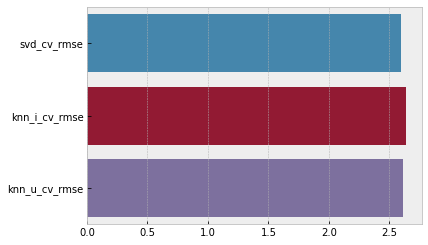

In [126]:
# Comparison of RMSE scores(mean cv) from different collaorative algorithms
sns.barplot(y=['svd_cv_rmse','knn_i_cv_rmse', 'knn_u_cv_rmse'],
            x=[svd_cv['test_rmse'].mean(),KNN_I_cv['test_rmse'].mean(), KNN_U_cv['test_rmse'].mean()])

For CV scores, SVD & KNN user based collabrative filtering both are giving a better perfromance

# 10. In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation systems can be useful in multiple scenarios like:

    When there is no data about the user and items.
    
    When it is required to show most popular items in different categories along with personalized results like:
    
        Most popular  tamil movies in 2022 on a music website/app
    
        Most popular trend in western wear or traditional wear
    
        Most popular holiday packages for honeymoon trips, or bike trips or himalayan trips etc
        
        Most preferred Hotels in Panjim (Goa)
        
        Most reviewed mobile phone in 2022

# 11. In what business scenario you should use CF based Recommendation Systems ?

Collaborative filtering is useful in scenarios like:

    Giving personalised recommendation to the user, when user history or item data is available. Some examples can be:
    
    Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc
    
    Person who has purchased boat smartwatch in past shares interest with similar people. He would be suggested with a different brand or higher model of smartwatches
    
    Person who has bought television in the past would be suggested with a stabilizer/remote control/chromecast/ etc...
    
    Person who has bought a mobile phone would be suggested with an earphone/mic/powerbank etc..

# 12. What other possible methods can you think of which can further improve the recommendation for different users ?


Multiple recommender systems are combined to improve recommendations:
    Other from Popularity and Collaborative Filtering, hybrid recommendation methods like Content+Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.

Sometimes not recommending or simple recommendation is the best option

A common approach is to use Latent Factor models for high level recommendation and then improving them using content based systems by using information on users or items

Show highest rated items in product recommendations. Try injecting some social proof into your product recommendations by displaying items that have the highest customer reviews.

Researchers believe that comparing products, rather than rating them on an absolute scale, will lead to algorithms that better predict customers

Display Products Based on Browsing History

Use “Frequently Bought Together” Recommendations

Introduce Shoppers to New Items

Show Products “Related to Items You’ve Viewed” 

Point to New Products 

Feature Best-Selling Items For Each Brand

Show Bestsellers Across Different Categories

etc..